# Prediction of individuals most likely to have bank account

## 1) Defining the questions

### 1) Specifying the question
- Predict which people are most likely to use a bank account Kenya, Rwanda, Tanzania, & Burundi

### 2) Metric of Success
- The section of demography that is most likely to have or use a bank account is established in Kenya, Rwanda, Tanzania, & Burundi

### 3) Understanding the context
- The data is collected from 3 east african countries
    - Kenya
    - Uganda
    - Rwanda
    - Tanzania
- The data is from a period of 3 years
     - 2018, 2017, 2016
- The data has records of 'Country', 'Year', 'UniqueID', 'Has a Bank Account', 'Type of Location' 'Cell Phone Access', 'Household Size','Respondent Age', 'Respondent Gender', 'Relationship with Head', 'Marital Status', 'Level of Educuation', 'Type of Job'
- The data is sampled from with an aim of establishing people with bank accounts and what they might have in common


### 4) Experimental Design

- **Null Hypothesis**: 
        - There is no difference in bank account holders across males and females
        - There is no difference in bank account holders across 24-87 years
        - There is no difference in bank account holders across household sizes
        - There is no difference in bank account holders across educational level
        - There is no difference in bank account holders across job type
        - There is no difference in bank account holders across Marital status

- **Alternate Hypothesis**: 
        - There number of bank account holders differs across males and females
        - There number of bank account holders differs across across 24-87 years
        - There number of bank account holders differs across household sizes
        - There number of bank account holders differs across  educational level
        - There number of bank account holders differs across  job type
        - There number of bank account holders differs across Marital status

- **Significance Level**
        - Significance Level (a) is set at 0.05

- **Design of experiment** 
      — The calculated t-statistic and corresponding p_value will be obtained
      - The null hypothesis will be rejected or accepted using the p-value in releation to the significance level
- **Sample size (n)** 
        — 23, 524 individuals

### 5) Data relevance
- Country interviewee is in.
- Year survey was done in.
- Unique identifier for each interviewee
- Type of location: Rural, Urban
- If interviewee has access to a cellphone: Yes, No
- Number of people living in one house
- The age of the interviewee
- Gender of interviewee: Male, Female
- The intervieweeâ€™s relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know
- The martial status of the interviewee: Married/- Living together, Divorced/Seperated, Widowed, Single/Never Married, Donâ€™t know
- Highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Dont know/RTA
- Type of job interviewee has: Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Dont Know/Refuse to answer


## 2) Importing Libraries

In [285]:
# Importing pandas library
import pandas as pd

# Importing Numpy Library
import numpy as np

# Importing Seaborn library
import seaborn as sns

# Importing Matplotlib Libary
import matplotlib

# importing pyplot from matplotlib library
from matplotlib import pyplot as plt

# Importing product from itertools library
from itertools import product

# Importy scipy stats
import scipy.stats

# Import chi2_contingency from scipy stats
from scipy.stats import chi2_contingency 


## 3) Reading Data

In [286]:
# Loading the dataset with the definitions of variables in finscope survey dataset
# url = 'http://bit.ly/VariableDefinitions'
# Specifying URL
#
url = 'http://bit.ly/VariableDefinitions'

# Reading the URL data
variable_definition_df = pd.read_csv(url)

- The variables definition dataframe provides the information on the data contained in each column

In [287]:
# Loading the Finscope survey dataframe
# url1 = ' http://bit.ly/FinancialDataset'
# Specifying URL
#
url1 = 'http://bit.ly/FinancialDataset'

# Reading data in the URL
finscope_df = pd.read_csv(url1)


### 4) Checking the Data

In [288]:
# Previewing the entire variable definition data frame
variable_definition_df

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [289]:
# previewing the top of Finscope dataset
finscope_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [290]:
# previewing the bottom of Finscope dataset
finscope_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [291]:
# Determining the number of records in the finscope dataset
print(f'The table has {finscope_df.shape} rows and columns respectively')

The table has (23524, 13) rows and columns respectively


Finscope data frame:
- rows 23524
- Columns 13

In [292]:
# Checking data types of the different columns
finscope_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


All the columns in the finscope dataframe had the right data types

## 5) External data source validation

The data was verified using the known average household sizes for two countries in the finscope data frame; Kenya and Uganda. 
- The average household size in Kenya as of 2018 was 3.9 individuals per household as per KNBS statistics
- The average household size in Uganda as of 2018 was 4.7 individuals per household as per Ugandan Bereau of Statistics

In [293]:
# Average household size per country

av_household_size = finscope_df.groupby(['country'])['household_size'].mean()
av_household_size

country
Kenya       3.987310
Rwanda      4.481838
Tanzania    1.931432
Uganda      4.983771
Name: household_size, dtype: float64

- Kenya from the data frame had an average household size of 3.987. This didn't vary significantly with the expected value of 3.9 from the kenyan census statistics
- Uganda from the data frame had an average household size of 4.983. This didn't vary significantly with the expected value of 4.7 from the Ugandan census statistics
- Using thi information we can conclude that the data is accurate and hence can be used for subsequent analysis

## 6) Tidying the dataset

**1. Checking for outliers**

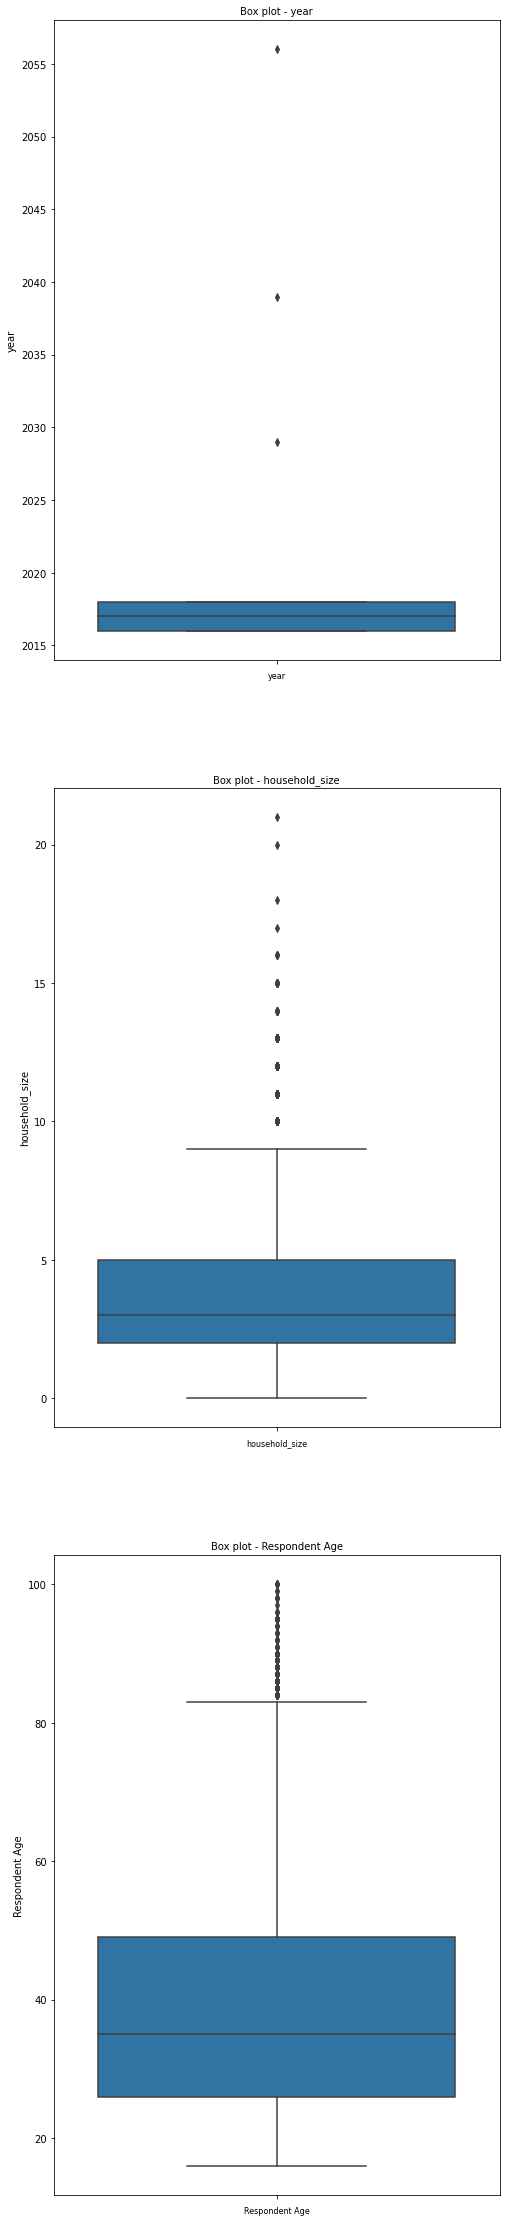

In [294]:
# Check for outliers
column_names = ['year', 'household_size', 'Respondent Age']

fig, ax = plt.subplots(len(column_names), figsize=(8,40))

for i, col_val in enumerate(column_names):

    sns.boxplot(y=finscope_df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

- The year, respondent age, and household size all had outliers

**2. Removing outliers**

In [295]:
# Renaming the respondent age column
finscope_df. rename(columns = {'Respondent Age':'respondent_age'}, inplace = True)

In [296]:
# Removing outliers
# Removing outliers in the year column
finscope_df1 = finscope_df [np.abs(finscope_df.year-finscope_df.year.mean()) <= (3*finscope_df .year.std())]

# Remove outliers in the household size column
finscope_df1 = finscope_df1 [np.abs(finscope_df1.household_size-finscope_df1.household_size.mean()) <= (3*finscope_df1.household_size.std())]

# Remove outliers in the respondent age column
finscope_df1 = finscope_df1 [np.abs(finscope_df1.respondent_age-finscope_df1.respondent_age.mean()) <= (3*finscope_df1.respondent_age.std())] 

# Show the remaining rows and columns after removing outliers
print(f"""
The shape of data frame before removing outliers was found to  {finscope_df.shape} rows and columns respectively, 
The shape of data frame after removing outliers was found to  {finscope_df1.shape} rows and columns respectively
"""  )


The shape of data frame before removing outliers was found to  (23524, 13) rows and columns respectively, 
The shape of data frame after removing outliers was found to  (23180, 13) rows and columns respectively



- A total of 344 records were lost after the outliers in year, respondent age, and household size were dealt with

**3. Checking and dealing with null values**

In [297]:
# Checking null values
finscope_df1.isnull().values.any()

True

- The data set has null values

In [298]:
# Checking the null values per attribute
finscope_df1.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        33
Type of Location          15
Cell Phone Access         11
household_size             0
respondent_age             0
gender_of_respondent      26
The relathip with head     0
marital_status            27
Level of Educuation       25
Type of Job               26
dtype: int64

- Year, uniqueID , household size, respondent age, relationship with head all lacked missing values
- The following are the columns with their missing values; 
-- country                   14
-- Has a Bank account        33
-- Type of Location          15
-- Cell Phone Access         11
-- gender_of_respondent      26
-- marital_status            27
-- Level of Educuation       25
-- Type of Job               26

- Has bank account had the most missing values 33 while cell phone access had the least missing values

- The missing values can be attributed to either the respondent failing to provide an answer to that attribute or error in recording the respondents response

In [299]:
# Check the percentage missing values per column
percent_missing = finscope_df1.isnull(). sum() * 100 / len(finscope_df1)
percent_missing

country                   0.060397
year                      0.000000
uniqueid                  0.000000
Has a Bank account        0.142364
Type of Location          0.064711
Cell Phone Access         0.047455
household_size            0.000000
respondent_age            0.000000
gender_of_respondent      0.112166
The relathip with head    0.000000
marital_status            0.116480
Level of Educuation       0.107852
Type of Job               0.112166
dtype: float64

- All attributes with missing values had missing values accounting for less than 1% of the total data observations
- Hence the entries with missing values will be dropped since they will not affect the data significantly

In [300]:
# Dropping missing values
finscope_df2 = finscope_df1.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False)

# Shape of finscope data set after dropping missing values
print(f"""
The finscope_df1 dataframe before dropping null values had {finscope_df1.shape} rows and columns respectively , 
The finscope_df2 dataframe after dropping null values had {finscope_df2.shape} rows and columns respectively, 
which accounted for {(1- len(finscope_df2)/ len(finscope_df1)) *100} percent of total data
""")


The finscope_df1 dataframe before dropping null values had (23180, 13) rows and columns respectively , 
The finscope_df2 dataframe after dropping null values had (23055, 13) rows and columns respectively, 
which accounted for 0.5392579810181153 percent of total data



- Only 0.539% of the data from finscope_df1 dataframe was lost upon eliminating all null values

**4. Check for anomalies after removing outliers**

In [301]:
# Checking for anomalies in country of respondent
finscope_df2['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

- **Anomally not found**
- There were 4 countries being studied; Kenya, Uganda, tanzania, and rwanda. 
- The attribute country had only those four countries. No anomalies were found

In [302]:
# Checking for anomalies in year
finscope_df2['year'].unique()

array([2018, 2016, 2017])

- **Anomally not found**
- The study ran for 3 years; 2018, 2016, 2017
- The year attribute in the data frame had solely those three entries
- No anomalies were detected in the year column

In [303]:
# checking for anomalies in uniqueid
finscope_df2['uniqueid'].describe()

count          23055
unique          8678
top       uniqueid_1
freq               4
Name: uniqueid, dtype: object

- **Anomally not found**
- No anomalies in the unique Id attribute in the dataframe

In [304]:
# checking for anomalies in Has a Bank account
finscope_df2['Has a Bank account'].describe()

count     23055
unique        2
top          No
freq      19785
Name: Has a Bank account, dtype: object

- **Anomally not found**
- There were two expected entries in the 'has bank account' attribute in the dataframe;
            Yes
            No
- No other unusual entries were recorded in the 'has bank account' data frame column aside from the two

In [305]:
# checking for anomalies in Cell Phone Access
finscope_df2['Cell Phone Access'].describe()

count     23055
unique        2
top         Yes
freq      17184
Name: Cell Phone Access, dtype: object

- **Anomally not found**
- There were two expected entries in the 'Cell Phone Access' attribute in the dataframe;
            Yes
            No
- No other unusual entries were recorded in the 'Cell Phone Access' data frame column aside from the two

In [306]:
# Checking for anomalies in household size column
finscope_df1['household_size'].unique()

array([ 3.,  5.,  8.,  7.,  1.,  6.,  4., 10.,  2.,  9.,  0.])

- **Anomally found**
- There expected entries in the 'Household size ' attribute in the dataframe should all be greater than 1. 
- No household can exist with 0 individuals
- Household size entry of 0 was recorded in the data frame

In [307]:
# Checking for anomalies in respondent age
finscope_df2['respondent_age'].unique()


array([24., 70., 26., 34., 32., 42., 54., 76., 40., 69., 64., 31., 38.,
       47., 27., 48., 25., 21., 18., 22., 58., 55., 62., 29., 35., 45.,
       67., 19., 80., 66., 50., 33., 28., 51., 16., 17., 30., 37., 59.,
       65., 46., 56., 52., 23., 43., 49., 44., 72., 53., 63., 39., 81.,
       78., 36., 20., 60., 71., 57., 85., 68., 41., 61., 75., 86., 73.,
       74., 88., 77., 84., 82., 79., 83., 87.])

- **Anomally not found**
- Ages of the respondents fell between 23- 88 years
- All these ages ae consitent with most age distributions of bank account holders

In [308]:
# Checking for anomalies in gender of respondent
finscope_df2['gender_of_respondent'].unique()

array(['Female', 'Male'], dtype=object)

- **Anomally not found**
- There were two expected entries in the 'Gender of respondent' attribute in the dataframe;
            Female
            Male
- No other unusual entries were recorded in the 'Gender of respondent' data frame column aside from the two

In [309]:
# Checking for anomalies in The relathip with head
finscope_df2['The relathip with head'].unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives'], dtype=object)

- **Anomally not found**
- All relations recorded were expected among people in a society

In [310]:
# Checking for anomalies in marital_status
finscope_df2['marital_status'].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know'], dtype=object)

- **Anomally found**
- The expected marital status responses are ; 'Married/Living together', 'Widowed', 'Single/Never Married', 'Divorced/Seperated',
- However a response of 'Dont Know' was recorded

In [311]:
# Checking for anomalies in Level of Educuation 
finscope_df2['Level of Educuation'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6'], dtype=object)

- **Anomally Found**
- Expected responses to level of education are; 'Secondary education', 'No formal education', 'Vocational/Specialised training', 'Primary education', and 'Tertiary education'
- A response 'Other' is also acceptable if that level of education is not caputured in questionaire
- However a response on level of education as '6' was recorded.

In [312]:
# Checking for anomalies in Type of Job 
finscope_df2['Type of Job'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

- **Anomally not Found**
- All responses indicating once source of income fell within the expected occupation roles of individuals in society

**5. Dealing with anomalies**

Anomalies were recorded;
- Household size: anomally - '0'
- Marital status: anomally - 'Dont Know'
- Level of education; anomally - '6'


**A. Household size**

In [313]:
# Dealing with anomaly in year
household_size = finscope_df2[finscope_df2['household_size']== 0]

# percentage of records with household sizes of 0
percentage = len(household_size)/ len(finscope_df2) * 100

# printing output
print(f"""
Number of recodes with household size of 0 {household_size.shape}.
Percentage of records with household size of 0 {percentage}.

""")


Number of recodes with household size of 0 (33, 13).
Percentage of records with household size of 0 0.1431359791802212.




- There are a total of 33 records with house_hold sizes of zero which ammounted to 0.1431%
- Hence these records can be dropped

In [314]:
# Dropping records with household sizes of zero
finscope_df3 = finscope_df2[finscope_df2['household_size'] > 0]
finscope_df3.shape

(23022, 13)

- 33 Records with household sizes of zero dropped

**b. Marital status**

In [315]:
# Dealing with anomally in Marital status
marital_status = finscope_df3[finscope_df3['marital_status'] == 'Dont know']

# percentage of records with household sizes of 0
percentage1 = len(marital_status)/ len(finscope_df3) * 100

# printing output
print(f"""
Number of recodes with household size of 0 {marital_status.shape}.
Percentage of records with household size of 0 {percentage1}.

""")


Number of recodes with household size of 0 (8, 13).
Percentage of records with household size of 0 0.03474937016766571.




- There are only 8 records with that anomally in the marital status atrribute
- It accounts for 0.03475 % hence can be dropped

In [316]:
# Dropping records with marital status of 'dont know'
finscope_df3 = finscope_df3[finscope_df3['marital_status'] != 'Dont know']
finscope_df3.shape

(23014, 13)

- 8 records dropped from the dataframe

**c. Level of education**

In [317]:
# Dealing with anomally in Level of education
education_level = finscope_df3[finscope_df3['Level of Educuation'] == '6']

# percentage of records with household sizes of 0
percentage2 = len(education_level)/ len(finscope_df3) * 100

# printing output
print(f"""
Number of recodes with household size of 0 {education_level.shape}.
Percentage of records with household size of 0 {percentage2}.

""")


Number of recodes with household size of 0 (26, 13).
Percentage of records with household size of 0 0.1129747110454506.




- There are only 26 records with this anommaly
- They account for 0.11297% of all records in data frame hence can be dropped

In [318]:
# Dropping records with marital status of 'dont know'
finscope_df3 = finscope_df3[finscope_df3['Level of Educuation'] != '6']
finscope_df3.shape

(22988, 13)

- 26 records from the original dataframe were dropped

6. **Renaming Column Names**

In [319]:
finscope_df3.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [320]:
# Renaming column names
finscope_df3.rename(columns = {'country': 'Country', 'year': 'Year', 'uniqueid': 'UniqueID', 'Has a Bank account': 'Has a Bank Account', 
                                'Type of Location': 'Type of Location', 'Cell Phone Access': 'Cell Phone Access', 'household_size': 'Household Size',
                                'respondent_age': 'Respondent Age', 'gender_of_respondent': 'Respondent Gender', 'The relathip with head': 'Relationship with Head', 
                                'marital_status': 'Marital Status', 'Level of Educuation': 'Level of Educuation', 'Type of Job': 'Type of Job'}, inplace = True)
finscope_clean = finscope_df3
finscope_clean.head(1)

,Country,Year,UniqueID,Has a Bank Account,Type of Location,Cell Phone Access,Household Size,Respondent Age,Respondent Gender,Relationship with Head,Marital Status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed


## 7) Univariant Analysis

### 7.1 Numerical Variables

**A. Mean**

In [321]:
# Mean of the year, household size and respondent age attributes
mean_age = finscope_clean['Respondent Age'].mean()
mean_household_size = finscope_clean['Household Size'].mean()
mean_year = finscope_clean[ 'Year'].mean()

print (f"""
The average age was found to be {mean_age} years.
The average household size was found to be {mean_household_size}.
The average year was found to be {mean_year}.
""")


The average age was found to be 38.570645554202194 years.
The average household size was found to be 3.631546894031669.
The average year was found to be 2016.971332869323.



- Average age = 38.57 years
- Average household size was found to be 3.63 individuals
- Mean year was 2016.971 

**B. Mode**

In [322]:
# Modefor year, age and household size
mode_age = finscope_clean['Respondent Age'].mode()
mode_household_size = finscope_clean['Household Size'].mode()
mode_year = finscope_clean[ 'Year'].mode()

print (f"""
The mode age was found to be {mode_age} years.
The mode household size was found to be {mode_household_size}.
The mode year was found to be {mode_year}.
""")


The mode age was found to be 0    30.0
dtype: float64 years.
The mode household size was found to be 0    2.0
dtype: float64.
The mode year was found to be 0    2016
dtype: int64.



- Most common age was 30 years among the respondents
- Most common household size  was 2 individuals among the respondents
- Most records were the year 2016 

**C. Median**

In [323]:
# Median for year, age and household size
median_age = finscope_clean['Respondent Age'].median()
median_household_size = finscope_clean['Household Size'].median()
median_year = finscope_clean[ 'Year'].median()

print (f"""
The median age was found to be {median_age} years.
The median household size was found to be {median_household_size} individuals.
The median year was found to be {median_year}
""")


The median age was found to be 35.0 years.
The median household size was found to be 3.0 individuals.
The median year was found to be 2017.0



### 7.2 Mesuares of dispersion

**A. Standard deviation**

In [324]:
# Measure of standard deviation in age and household size
age_std = finscope_clean['Respondent Age'].std()
household_size_std = finscope_clean['Household Size'].std()

print(f""" The standard deviation in respondents age is {age_std} years.
 The standard deviation in household size is {household_size_std} individuals
 """
)

 The standard deviation in respondents age is 16.14023714326022 years.
 The standard deviation in household size is 2.1487228089044605 individuals
 


**B. Variance**

In [325]:
# Variance in respondent age and household size in the finscope data frame
age_var = finscope_clean['Respondent Age'].var()
household_size_var = finscope_clean['Household Size'].var()

print(f""" The Variance in respondents age is {age_var} years.
 The Variance in household size is {household_size_var} individuals
 """
)

 The Variance in respondents age is 260.5072550406768 years.
 The Variance in household size is 4.6170097095062745 individuals
 


**C. Quantiles**

In [326]:
# Quantiles in respondent age and house hold size
age_quartiles = finscope_clean['Respondent Age'].quantile([0.25,0.5,0.75])
household_size_quartiles = finscope_clean['Household Size'].quantile([0.25,0.5,0.75])

print(f""" The quartiles in respondents age are 
{age_quartiles} years.
 The quartiles in household size are 
 {household_size_quartiles} individuals
 """
)


 The quartiles in respondents age are 
0.25    26.0
0.50    35.0
0.75    49.0
Name: Respondent Age, dtype: float64 years.
 The quartiles in household size are 
 0.25    2.0
0.50    3.0
0.75    5.0
Name: Household Size, dtype: float64 individuals
 


**D. Skewness**

In [327]:
age_skew = finscope_clean['Respondent Age'].skew()
household_size_skew = finscope_clean['Household Size'].skew()

print(f""" The skew in respondents age is {age_skew} years.
 The skew in household size is {household_size_skew} individuals
 """
)

 The skew in respondents age is 0.7828486764004298 years.
 The skew in household size is 0.6950018782867871 individuals
 


- The skews in both the respondents age and household size were positively skewed
- This showed that the distribution in both was tailed to the right side

**E. Kurtosis**

In [328]:
age_kurt = finscope_clean['Respondent Age'].kurt()
household_size_kurt = finscope_clean['Household Size'].kurt()

print(f""" The kurtosis in respondents age is {age_kurt} years.
 The kurtosi in household size is {household_size_kurt} individuals
 """
)

 The kurtosis in respondents age is -0.10787959859878749 years.
 The kurtosi in household size is -0.2469226356191312 individuals
 


- Both respondent age and household sizes generated negative kurtosis values 
- This implied that the distribution has lighter tails than a normal distribution

**F. summary statistics**

In [329]:
# Describing the data in the dataframe
finscope_clean.describe()

,Year,Household Size,Respondent Age
count,22988.000000,22988.000000,22988.000000
mean,2016.971333,3.631547,38.570646
std,0.848207,2.148723,16.140237
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,10.000000,88.000000


### 7.3 Visualizations

### 7.3.1 Histograms

**A. respondent age**

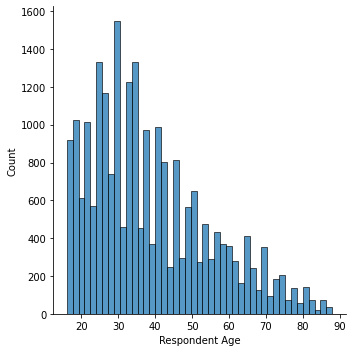

In [330]:
# Histogram of repondents age
sns.displot(finscope_clean['Respondent Age'], kde=False,label='Respondent Age')

- Most respondnents fell between 30-40 years

**B. Household size**

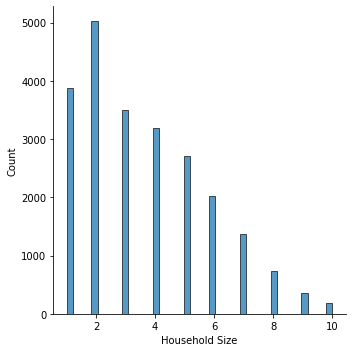

In [331]:
# Histogram showing level of education of respondents
sns.displot(finscope_clean['Household Size'], kde=False,label='Household size')

- Most common householdsize was 2 

###  7.3.2 Pie charts

**A. Level of education**

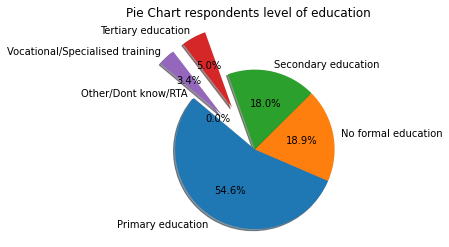

In [332]:
# Education level pie charts
# Assigning our columns to Marital Status variables
education_level       = finscope_clean['Level of Educuation'].value_counts()
education_level 
explode = (0, 0, 0, 0.6, 0.6, 0)
# Plotting our pie chart
# -------
plt.pie(education_level , explode = explode, labels = education_level .index, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart respondents level of education')
plt.show()

**B. Marital Status**

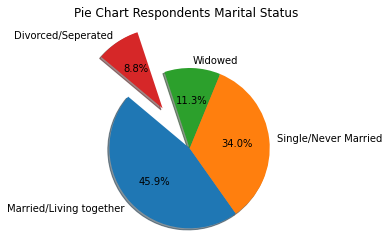

In [333]:
# Marital status pie chart
# Assigning our columns to marital status variables
marital_status       = finscope_clean['Marital Status'].value_counts()
marital_status
explode = (0, 0, 0, 0.6)
# Plotting our pie chart
# -------
plt.pie(marital_status, explode = explode, labels = marital_status.index, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart Respondents Marital Status')
plt.show()

**C. Respondents per country**

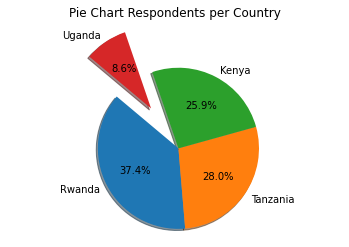

In [334]:
# Respondents per country pie chart
# Assigning our columns respondents per country variables
respondents_per_country = finscope_clean['Country'].value_counts()
respondents_per_country
explode = (0, 0, 0, 0.6)
# Plotting our pie chart
# -------
plt.pie(respondents_per_country, explode = explode, labels = respondents_per_country.index, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart Respondents per Country')
plt.show()

#### 7.3.3  Bar Charts

**A. Respondent gender**

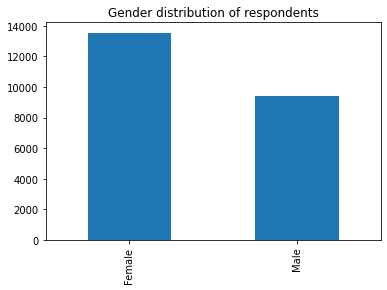

In [335]:
# plotting a bar chart to represent peoples genders
finscope_clean['Respondent Gender'].value_counts().plot.bar(title='Gender distribution of respondents')

**B. Has bank account**

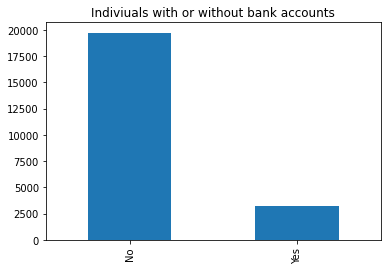

In [336]:
# plotting a bar chart to represent peoples with or without bank accounts
finscope_clean['Has a Bank Account'].value_counts().plot.bar(title='Indiviuals with or without bank accounts')


**C. Individuals with Cell phone access**

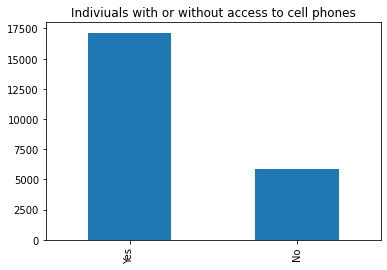

In [337]:
# plotting a bar chart to represent peoples with or without access to cell phones
finscope_clean['Cell Phone Access'].value_counts().plot.bar(title='Indiviuals with or without access to cell phones')


**C. Type of Job**

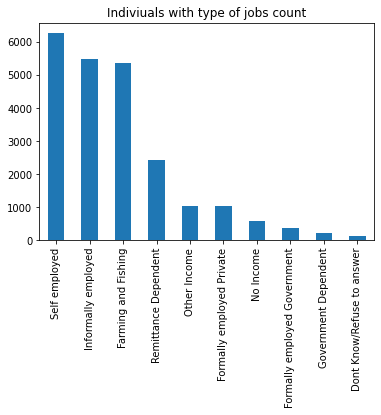

In [338]:
# plotting a bar chart to classify people according their type of job
finscope_clean['Type of Job'].value_counts().plot.bar(title='Indiviuals with type of jobs count')


## 8.0 Bivariant Analysis

### 7.1 Scatter plots

**A. Age and House hold size**

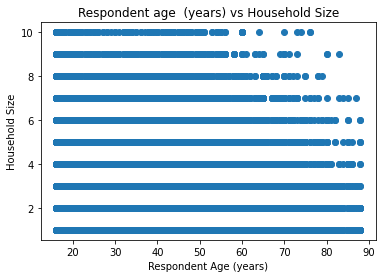

In [339]:
# Plotting scatter plot of age compared to household size
# Using Matplotlib: Plotting our scatterplot to compare the variables
plt.scatter(finscope_clean["Respondent Age"], finscope_clean["Household Size"] )

# Giving our scatterplot a title
plt.title('Respondent age  (years) vs Household Size')

# Labelling our x axis
plt.xlabel('Respondent Age (years)')

# Labelling our y axis
plt.ylabel('Household Size')

# display of scatterplot 
plt.show()

### &.2 Correlation

**A. correllation between numerical data**

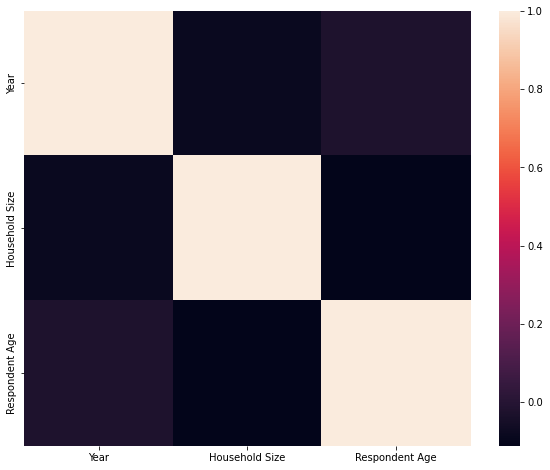

In [340]:
# Plotting correlation chart between all columns in finscope data frame
f, ax = plt.subplots(figsize=(10, 8))
corr = finscope_clean.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

- The year, household size, and respondent age all have a correlation less than 0.5
- This indicates all these attributes have a poor correlation among each other

**B. Correlation Between categorical Data**

In [341]:
# Creating dataframes with all categorical dataframes
df_finscope = pd.DataFrame(data = finscope_clean.dtypes, columns = 
                                         ['a']).reset_index()
finscope_var = list(df_finscope['index'].loc[df_finscope['a'] == 'object'])
finscope_var
df_finscope = finscope_clean[finscope_var]

# deleting unique ID data frame
del df_finscope['UniqueID']
df_finscope.head()

,Country,Has a Bank Account,Type of Location,Cell Phone Access,Respondent Gender,Relationship with Head,Marital Status,Level of Educuation,Type of Job
0,Kenya,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed


In [342]:
# splitting the list into two parts
finscope_var1 = ('Country', 'Has a Bank Account', 'Type of Location',
'Cell Phone Access', 'Respondent Gender', 'Relationship with Head',
'Marital Status', 'Level of Educuation', 'Type of Job')

finscope_var2 = ('Country', 'Has a Bank Account', 'Type of Location',
'Cell Phone Access', 'Respondent Gender', 'Relationship with Head',
'Marital Status', 'Level of Educuation', 'Type of Job')

# Creating all possible combinations between the two variables
finscope_var_prod = list(product(finscope_var1,finscope_var2, repeat = 1))

In [343]:
# find correlation between the all data values in data frame
finscope_corr = finscope_clean.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
finscope_corr

,Country,Year,UniqueID,Has a Bank Account,Type of Location,Cell Phone Access,Household Size,Respondent Age,Respondent Gender,Relationship with Head,Marital Status,Level of Educuation,Type of Job
Country,1.000000,0.522730,-0.152985,0.161784,0.153008,0.150142,0.141925,-0.005928,-0.025706,-0.003290,0.237521,0.149724,-0.218403
Year,0.522730,1.000000,0.158050,0.136913,0.249162,0.141956,0.208616,0.009333,0.017787,0.023006,0.390507,0.218103,-0.262878
UniqueID,-0.152985,0.158050,1.000000,0.024569,-0.067535,-0.034664,-0.017645,0.016302,0.006548,0.007755,-0.010553,-0.002679,0.052304
Has a Bank Account,0.161784,0.136913,0.024569,1.000000,-0.089689,0.209507,0.019900,0.034958,-0.116162,0.037523,0.071927,0.016107,0.046370
Type of Location,0.153008,0.249162,-0.067535,-0.089689,1.000000,0.086608,0.140780,-0.032065,0.014231,0.032654,0.243684,0.023525,-0.247881
Cell Phone Access,0.150142,0.141956,-0.034664,0.209507,0.086608,1.000000,0.075749,0.066030,-0.103109,0.013263,0.119896,-0.015834,0.003853
Household Size,0.141925,0.208616,-0.017645,0.019900,0.140780,0.075749,1.000000,-0.000252,0.010719,-0.048480,0.178267,0.058081,-0.112859
Respondent Age,-0.005928,0.009333,0.016302,0.034958,-0.032065,0.066030,-0.000252,1.000000,0.012535,0.025384,-0.009836,-0.037988,0.048747
Respondent Gender,-0.025706,0.017787,0.006548,-0.116162,0.014231,-0.103109,0.010719,0.012535,1.000000,0.234326,0.015243,0.022539,-0.099462
Relationship with Head,-0.003290,0.023006,0.007755,0.037523,0.032654,0.013263,-0.048480,0.025384,0.234326,1.000000,0.446069,-0.083908,0.090110


- Most columns aside from year and country exhibited a correlation of less tha 0.5 implying a poor correlation amost each other

## 9.0 Multivaiant Analysis

- Here we will perform MCA analysis since we are dealing with categorical variables
- This attribute is a latent variable

**A. MCA dimension reduction analysis**

In [344]:
X = finscope_clean.drop('UniqueID', axis=1)
j_sup = finscope_clean.UniqueID
i_sup = np.array([0, 1, 0, 1, 0, .5, .5, 1, 0, 1, 0, 0, 1, 0, .5, .5, 1, 0, .5, .5, 0, 1])
ncols = 13

In [345]:
!pip install prince

In [346]:
import prince
mca = prince.MCA()

In [347]:
mca = mca.fit(X) # same as calling ca.fs_r(1)
mca = mca.transform(X) # same as calling ca.fs_r_sup(df_new) for *another* test set.
mca.head()

,0,1
0,-0.052094,-0.015620
1,0.137870,0.001699
2,-0.056189,0.026160
3,-0.014741,-0.019297
4,-0.057818,-0.011582
